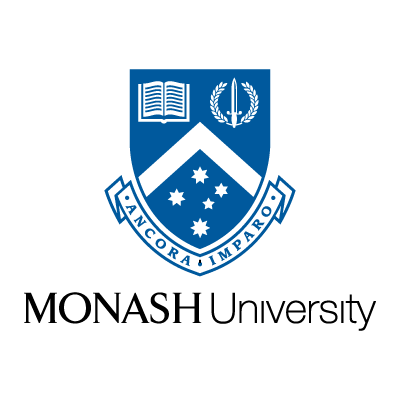

# FIT5196 Task 1 in Assessment 1
#### Student Name: Nisheeth Shah
#### Student ID: 29599644

Date: 02/09/2018

Environment: Python 3.x and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* os (for accessing path) 
* re (for regular expression, included in Anaconda Python 2.7) 
* json (for handling json data file) 

## Task 1: Parsing Raw Text Files 

### Importing required libraries

In [71]:
import re
import json
import os

### Reading dat data file

In [72]:
with open('29599644.dat','r') as dat_file:
    content = dat_file.readlines()

### Check the total number of jobs posts

Every job ends by "------------------------------" in the file. We count the number of such dashes to identify the number of jobs.

In [73]:
number_of_jobs = 0

# converting the list of lines into one string
content_str = "".join(content)
content_str.replace("OPEN TO/", "").replace("REMUNERATION/", "")
content_str.replace("\n\n", "")


number_of_jobs = content_str.count("------------------------------")
print("Total number of job posts:", number_of_jobs)

Total number of job posts: 31780


### List of 11 regular expressions

In [74]:
# List of regular expression to CATCH ALL THE TEXTS after wherever header ("id:", "title, "location", etc) found
regexes = ['ID: (\d{5})',
           '\n(JOB)?(_|\s)?t(tl)?(itle)?(s)?:(.*\n*)*',
           '\n((job)?(_|\s)?loc(ation)?(s)?):(.*\n*)*',
           '\n((job)?(_|\s)?desc(ription)?(s)?):(.*\n*)*',
           '\n((job)?(_|\s)?resp(s)?(ONSIBILIT)?(y|ies)?):(.*\n*)*',
           '\n((REQ)?(UIRED)?(_|\s)?QUAL(IF)?(ICATION)?(S)?):(.*\n*)*',
           '\n((REMUNERATION)|((job)?(_|\s)?sal(ary)?)):(.*\n*)*',
           '\n(job)?(_|\s)?proc(edure)?(s)?:(.*\n*)*',
           '\n((DA(TE)?(s)?(_|\s)?(START)?)|(START(_|\s)?DA(TE)?)):(.*\n*)*',
           '\n((APPLICATION_D(EAD)?L)|(DEAD(_)?LINE(s)?)):(.*\n*)*',
           '\n((ABOUT(_|\s)?(COMPANY)?)|((COMPANY)?(S)?_INFO)):(.*\n*)*']

# List of regular expression to CATCH ONLY THE HEADERS
regexes_tags = ["ID: (\d{5})",
           "\n(JOB)?(_|\s)?t(tl)?(itle)?(s)?: ",
           "\n((job)?(_|\s)?loc(ation)?(s)?): ",
           "\n((job)?(_|\s)?desc(ription)?(s)?): ",
           "\n((job)?(_|\s)?resp(s)?(ONSIBILIT)?(y|ies)?):",
           "\n((REQ)?(UIRED)?(_|\s)?QUAL(IF)?(ICATION)?(S)?):",
           "\n((REMUNERATION)|((job)?(_|\s)?sal(ary)?)): ",
           "\n(job)?(_|\s)?proc(edure)?(s)?: ",
           "\n((DA(TE)?(s)?(_|\s)?(START)?)|(START(_|\s)?DA(TE)?)): ",
           "\n((APPLICATION_D(EAD)?L)|(DEAD(_)?LINE(s)?)): ",
           "\n((ABOUT(_|\s)?(COMPANY)?)|((COMPANY)?(S)?_INFO)):"]

### Function to find the content for each header ("id:", "title, "location", etc)
For e.g.: for below job:

<font color = "blue">
ID: 48505
COMPANYS_INFO:
 Triyan LLC is a food importing and processing company.
LOCATION: Yerevan, Armenia
DEAD_LINE: 04 April 2015
START DATE: 12 October 2015
JOB RESPONSIBILITIES:
 The study of supply of internal market and demand
of external(foreign) market.
job_desc: The incumbent will be responsible for customers'
settlement transaction processing.
REQUIRED QUALIFICATIONS:
 - Higher education in relevant field;
- Minimum one year of operational experience as a chief accountant,
experience in banking system is desirable.
REMUNERATION/
JOB TITLE: Suitably qualified professional firms or groups of individual
trainers
OPEN TO/
remuneration: Highly competitive, based on experience.</font>

The inside content for "title" will be:
<font color = "blue">Suitably qualified professional firms or groups of individual trainers</font>

<font color = "red">Note: we'll use the term regex for regular expression in the whole document</font>

In [75]:
def occurrence_check(regex_str, group_number):
    
#     Split all the jobs from string to individual jobs
    individual_jobs = content_str.split("------------------------------")
    result_list = []
    found_count = 0
    
#     By using split, an empty element is added in the list in the end. We remove this last element
    individual_jobs = individual_jobs[:-1]
    
    for each_job in individual_jobs:
        
#         If the regex is found -
        if re.search(regex_str, each_job, re.IGNORECASE):
            
#             store the found string in temporary string variable
            temp_str = re.search(regex_str, each_job, re.IGNORECASE).group(group_number)
            
#         We remove the headers and keep only the inside content - 
            for each_reg in regexes[1:]:
                
                if (each_reg != regex_str) and re.search(each_reg, temp_str, re.IGNORECASE):
                    m = re.search(each_reg, temp_str, re.IGNORECASE).group(0)
                    temp_str = temp_str.replace(m, "")
    
            for each_reg in regexes_tags[1:]:
                if re.search(each_reg, temp_str, re.IGNORECASE):
                    m = re.search(each_reg, temp_str, re.IGNORECASE).group(0)
                    temp_str = temp_str.replace(m, "")

#             Append each inside content into result_list list variable
            result_list.append(temp_str + "\n")
            
            found_count += 1
            
#         If nothing found by regex, we add NA for that header tag
        else:
            result_list.append("\nNA" + "\n")
            
#     Return the found+not found result of the function
    return result_list

The above function works with following steps:
- Pull data for each header till the end of the job ad
- Use another set of regex to remove all the junk info. For eg.: sub data for title will include all data from title to the end of the ad. This includes other headers too. But we use another set of regex and remove the junk. Therefore, the sub data for title will include data only for title
- This approach is implemented on all the headers
- Moreover, other steps are also implemented like removing the stopwords

### Call above function for all the headers and store the result in respective list

In [76]:
id_list = occurrence_check(regexes[0], 1)
jobtitle_list = occurrence_check(regexes[1], 0)
joblocation_list = occurrence_check(regexes[2], 0)
jobdescription_list = occurrence_check(regexes[3], 0)
jobresponsibility_list = occurrence_check(regexes[4], 0)
jobqualification_list = occurrence_check(regexes[5], 0)
jobsalary_list = occurrence_check(regexes[6], 0)
jobprocedure_list = occurrence_check(regexes[7], 0)
startdate_list = occurrence_check(regexes[8], 0)
enddate_list = occurrence_check(regexes[9], 0)
about_list = occurrence_check(regexes[10], 0)

### Now that we have all the inside content of each header, we shall create XML file using respective header list

In [77]:
# Open/create an XML file with 'write' rights

f = open("29599644.xml","w+")

# Enter the content in the XML file for each header
f.write('<?xml version="1.0" encoding="UTF-8" ?>\n')

f.write("<listings>\n")
for i in range(len(id_list)):
#     Start listing tag followed by ID
    f.write("\t<listing id='"+ id_list[i].replace("\n","") + "'>\n")
    
#     Job Title
    f.write("\t\t<title>"+ jobtitle_list[i].replace("\n"," ").strip(' ') + "</title>\n")
    
#     Job Location
    f.write("\t\t<location>"+ joblocation_list[i].replace("\n"," ").strip(' ').rstrip('.') + "</location>\n")
    
#     Job Description
    f.write("\t\t<job_descriptions>\n")
    f.write("\t\t\t<job_description>\n")
    f.write("\t\t\t\t" + jobdescription_list[i].replace("\n"," ").strip(' ').rstrip('.') + "\n")
    f.write("\t\t\t</job_description>\n")            
    f.write("\t\t</job_descriptions>\n")
    
#     Job responsibility
    f.write("\t\t<job_responsibilities>\n")
    str_resp = jobresponsibility_list[i].replace(" - ", "- ").replace("\n", "")
    str_resp_splitlist = str_resp.split(";- ")
    for each_element in str_resp_splitlist:
        f.write("\t\t\t<responsibility>\n")
        f.write("\t\t\t\t" + each_element.lstrip("- ").rstrip(".") + "\n")
        f.write("\t\t\t</responsibility>\n")            
    f.write("\t\t</job_responsibilities>\n")
    
#     Job Qualifications
    f.write("\t\t<required_qualifications>\n")
    str_qual = jobqualification_list[i].replace(" - ", "- ").replace("\n", "")
    str_qual_splitlist = str_qual.split(";- ")
    for each_element in str_qual_splitlist:
        f.write("\t\t\t<qualification>\n")
        f.write("\t\t\t\t" + each_element.lstrip("- ").rstrip(".") + "\n")
        f.write("\t\t\t</qualification>\n")            
    f.write("\t\t</required_qualifications>\n")
    
#     Salary
    f.write("\t\t<salary>" + jobsalary_list[i].replace("\n"," ").strip(' ').rstrip('.') + "</salary>\n")
    
#     Procedure
    f.write("\t\t<application_procedure>\n\t\t\t" + jobprocedure_list[i].replace("\n"," ").strip(' ').rstrip('.') + "\n\t\t</application_procedure>\n")
    
#     Start date
    f.write("\t\t<start_date>" + startdate_list[i].replace("\n"," ").strip(' ').rstrip('.') + "</start_date>\n")
    
#     End date
    f.write("\t\t<application_deadline>" + enddate_list[i].replace("\n"," ").strip(' ').rstrip('.') + "</application_deadline>\n")
    
#     About
    f.write("\t\t<about_company>" + about_list[i].replace("\n"," ").strip(' ').rstrip('.') + "</about_company>\n")

#     End the listing tag
    f.write("\t</listing>\n")

f.write("</listings>\n")
    

f.close()
print("XML file created!")

XML file created!


### Similarly, we create JSON file which will also have the inside content of each header

In [78]:
# Open/create an JSON file with 'write' rights
f = open("29599644.json","w+")

# Enter the content in the JSON file for each header
f.write('{\n\t"listings": {\n')
for i in range(len(id_list)):
#     Open listing tag
    f.write('\t\t"listing": [{\n')
    
#     ID
    f.write('\t\t\t"_id": "' + id_list[i].replace("\n","") +'",\n')
    
#     Job Title
    f.write('\t\t\t"title": "' + jobtitle_list[i].replace("\n"," ").strip(' ') +'",\n')
    
#     Job Location
    f.write('\t\t\t"location": "' + joblocation_list[i].replace("\n"," ").strip(' ').rstrip('.') +'",\n')
    
#     Job Description
    f.write('\t\t\t"job_descriptions": {\n\n')
    f.write('\t\t\t\t"description": ["' + jobdescription_list[i].replace("\n"," ").strip(' ').rstrip('.') + '"]')
    f.write('\n\t\t\t},')
    
#     Job responsibility
    f.write('\n\t\t\t"job_responsibilities": {\n')
    f.write('\t\t\t\t"responsibility": [')
    str_resp = jobresponsibility_list[i].replace(" - ", "- ").replace("\n", "")
    str_resp_splitlist = str_resp.split(";- ")
    temp_str_resp = ''
    for each_element in str_resp_splitlist:
            temp_str_resp = temp_str_resp + '\n\t\t\t\t\t"' + each_element.lstrip("- ").rstrip(".") + '",'
    temp_str_resp = temp_str_resp[:-1]
    f.write(temp_str_resp)
    f.write('\n\t\t\t\t]')
    f.write('\n\t\t\t},')
    
#     Job qualification
    f.write('\n\t\t\t"required_qualifications": {\n')
    f.write('\t\t\t\t"qualification": [')
    str_qual = jobqualification_list[i].replace(" - ", "- ").replace("\n", "")
    str_qual_splitlist = str_qual.split(";- ")
    temp_str_qual = ''
    for each_element in str_qual_splitlist:
            temp_str_qual = temp_str_qual + '\n\t\t\t\t\t"' + each_element.lstrip("- ").rstrip(".") + '",'
    temp_str_qual = temp_str_qual[:-1]
    f.write(temp_str_qual)
    f.write('\n\t\t\t\t]')
    f.write('\n\t\t\t},')

#     Salary
    f.write('\n\t\t\t"salary": "' + jobsalary_list[i].replace("\n"," ").strip(' ') +'",\n')
    
#     Procedure
    f.write('\t\t\t"application_procedure": "' + jobprocedure_list[i].replace("\n"," ").strip(' ') +'",\n')
    
#     Start date
    f.write('\t\t\t"start_date": "' + startdate_list[i].replace("\n"," ").strip(' ') +'",\n')
    
#     End data
    f.write('\t\t\t"application_deadline": "' + enddate_list[i].replace("\n"," ").strip(' ') +'",\n')
    
#     About
    f.write('\t\t\t"about_company": "' + about_list[i].replace("\n"," ").strip(' ') +'",')
    
#     Close the tags
    f.write("\n\t\t}]\n")
    f.write("\t}\n")

f.write("}")
    
# Close the file
f.close()
print("JSON file created!")

JSON file created!


## Summary
This task is about using regular expression to pull out some text in pattern from a big file of data.

Firstly, all the jobs are seperated. Then used regular expression to pull sub content of each header till the end of the sub content. But this include some junk information too.
To remove the junk data, we used regular expression again to remove the junk and make the sub content correct.

In this fashion, we have pulled out correct data for each header.

This correct data is written in XML or JSON file.